In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import urllib.request
from pylab import rcParams

In [ ]:
rcParams['figure.figsize'] = 9, 8

data_train = pd.read_csv("./poker_t.csv", header=None,
                       names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])
data_test = pd.read_csv("poker_tra_in.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])
# data_train=pd.DataFrame(data_train)
'''
EXPLORE THE DATA
'''
# summary statistics including counts, mean, stdev, quartiles for the training dataset
# data_train.head(n=5)
# data_train.dtypes # data types of each variable
data_train["CLASS"]=data_train["CLASS"].astype(int)
data_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
# subset clustering variables
cluster=data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']]

clustervar=cluster.copy()
clustervar['S1']=preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1']=preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2']=preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2']=preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3']=preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3']=preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4']=preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4']=preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5']=preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5']=preprocessing.scale(clustervar['C5'].astype('float64'))

clus_train = clustervar
clus_train

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

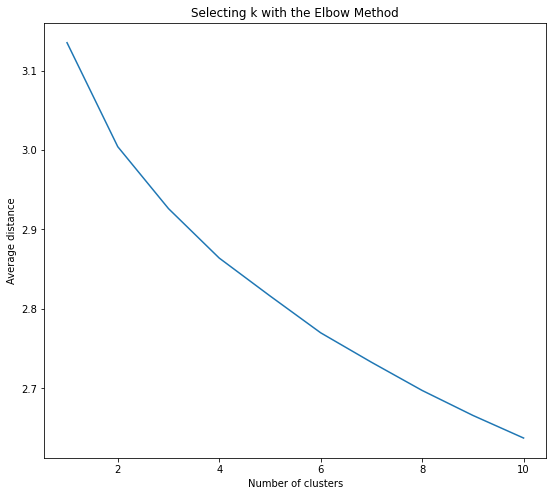

In [ ]:
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]


for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])


plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 

In [ ]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
ms = MeanShift()
ms.fit(clus_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(clus_train)):
    plt.plot(clus_train[i][0], clus_train[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

[[ 1.81233746e-04 -6.46744078e-04 -9.90191448e-04  1.06343173e-03
   5.87626414e-04  5.30778448e-04 -7.00808246e-05 -1.13334113e-03
  -8.87976236e-04  1.54132192e-05]]
Estimated clusters: 1


KeyError: ignored

[0 0 1 ... 1 0 1]
[1 1 1 ... 1 1 1]
[9 9 9 ... 1 1 1]
0.42379048380647744


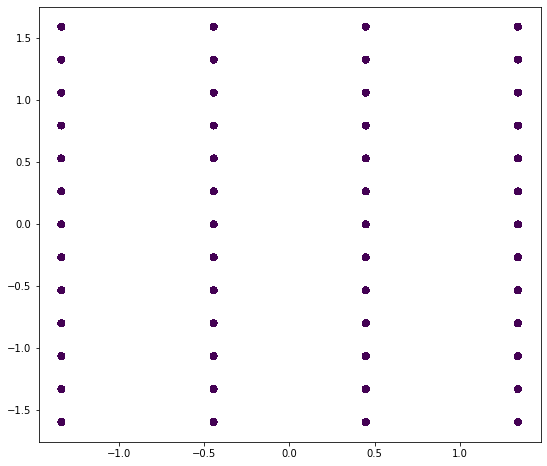

             S1        C1        S2        C2        S3        C3        S4  \
2      0.440001  1.334698  0.447766  1.058113  0.436073  1.598400  0.451689   
3      1.335688  0.801327  1.339234  1.058113  1.326445 -1.605959  1.347757   
4      1.335688 -1.598846  1.339234  1.589054  1.326445  1.331370  1.347757   
8      0.440001 -0.532103  0.447766 -0.269239  0.436073  0.530280  0.451689   
9      1.335688 -1.598846  1.339234 -0.800179  1.326445 -1.338929  1.347757   
...         ...       ...       ...       ...       ...       ...       ...   
25004  0.440001 -0.532103  0.447766 -0.003768  1.326445  1.064340  0.451689   
25005  0.440001  0.534641 -0.443702 -0.269239  1.326445  1.064340  1.347757   
25006  1.335688 -1.598846  1.339234  0.792643  0.436073  1.598400  0.451689   
25007 -0.455687 -1.598846 -0.443702  0.792643  1.326445 -0.804869  1.347757   
25009 -1.351374  0.001269  0.447766  1.058113  0.436073 -1.071899  1.347757   

             C4        S5        C5  cluster  
2   

In [ ]:
from sklearn import metrics
import time
final_dict={}
start_time = time.time()
model3=KMeans(n_clusters=2)
model3.fit(clus_train)
pred=model3.predict(clus_train)
print(pred)
pred[pred == 0] =1
# print()
print(pred)
print(data_train["CLASS"].values)
score = metrics.accuracy_score(data_train["CLASS"].values,pred)
# print(model3.labels_)
print(score)
final_dict["Non-distributed"]=score
plt.scatter(clus_train["S2"],clus_train["C2"], c=pred)
plt.show()
# center = np.array(model3.cluster_centers_)
# print(center)
# model3[model3.labels_==1]
# cluster_map['data_index'] = data_train.index.values
cluster_map = clus_train
cluster_map['cluster'] = model3.labels_
clust_one=cluster_map[cluster_map.cluster == 1]
# cluster_map.head()
print(clust_one)
center = np.array(model3.cluster_centers_)
# print(center)
print("TIME",time.time() - start_time)

0.6829268292682927


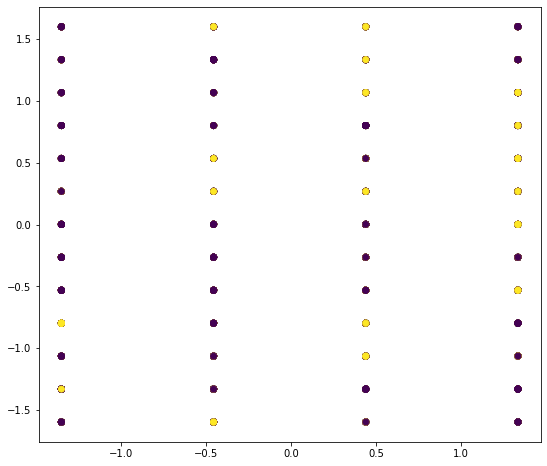

TIME 1.0894286632537842


In [ ]:
## 0.7C1 + 0.3C2
import time
start_time = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.30,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["7C1+3C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

0.6779911373707533
TIME 0.7868916988372803


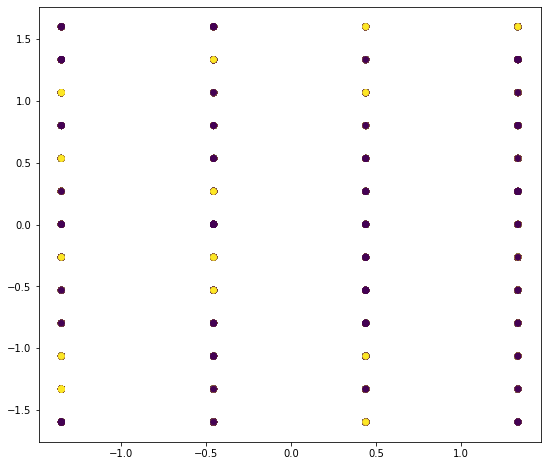

In [ ]:

from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.70,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["3C1+7C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)

print("TIME",time.time() - start_time)
plt.show()

0.6859688195991092


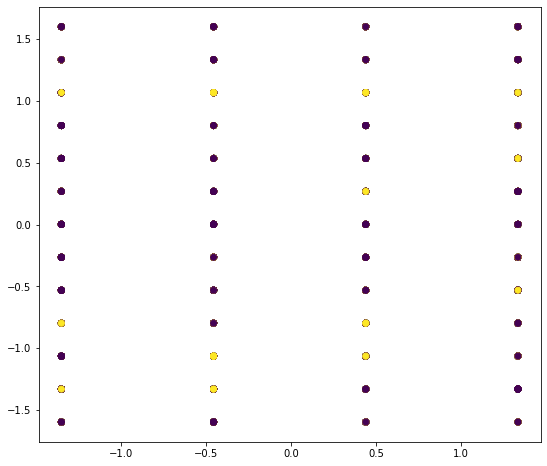

TIME 1.3038549423217773


In [ ]:
## 0.5C1 + 0.5C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.50,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["5C1+5C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

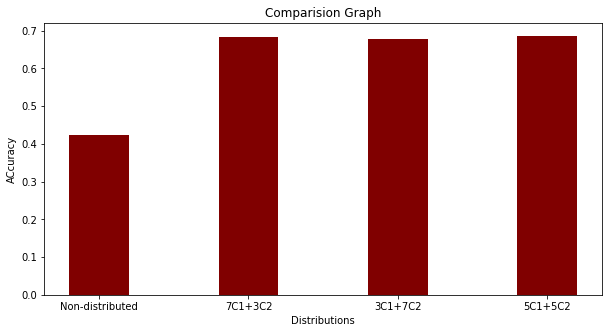

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
courses = list(final_dict.keys())
values = list(final_dict.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Distributions")
plt.ylabel("ACcuracy")
plt.title("Comparision Graph")
plt.show()

Text(0.5, 1.0, 'Scatterplot of Canonical Variables for 2 Clusters')

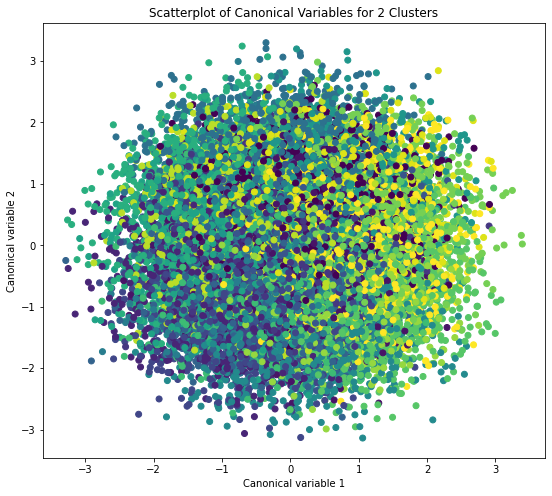

In [ ]:
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(clus_train) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')

In [ ]:
"""
Dr ;;
2: for each site s 2 f1; ... ; Sg do
3: Apply DML to data at site s;
4: Let Y ðsÞ
i ; i ¼ 1; 2; ... ; ns be the group centroids;
5: Let WðsÞ
i ; i ¼ 1; 2; ... ; ns be the group sizes;
6: Ys fY ðsÞ
i : i ¼
"""

from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=10).fit(center)
sc.labels_

array([1, 3, 2, 0, 2, 1, 2, 1, 2, 2, 3, 1, 1, 0, 0, 3, 3, 2, 3, 3])

In [ ]:
data_train = pd.read_csv("SkinSegmentation (1).csv")
print(data_train.head())
data_train=data_train.dropna()
without_center=data_train.drop("Class Label",axis=1)
without_center=without_center.dropna()
print(without_center.head())
without_center.shape

    B   G    R  Class Label
0   9  85  123            1
1  73  84  122            1
2  72  83  121            1
3  70  81  119            1
4  70  81  119            1
    B   G    R
0   9  85  123
1  73  84  122
2  72  83  121
3  70  81  119
4  70  81  119


(245057, 3)

[1 1 1 ... 1 1 1]
[1 1 1 ... 2 2 2]
0.059659589401649414


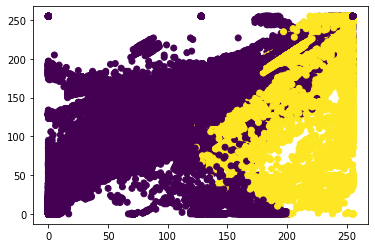

          B    G    R  cluster
0         9   85  123        1
1        73   84  122        1
2        72   83  121        1
3        70   81  119        1
4        70   81  119        1
...     ...  ...  ...      ...
244862  113  114   58        1
244863  113  114   58        1
244864  113  114   58        1
244865  116  115   64        1
244866  109  110   60        1

[68346 rows x 4 columns]
TIME 8.08717131614685


In [ ]:
## Non-distributed
from sklearn import metrics
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import time
final_dict={}
start_time = time.time()
model3=KMeans(n_clusters=3)
model3.fit(without_center)
pred=model3.predict(without_center)
# pred[pred == 1] =2
pred[pred == 0] =1
# print()
print(pred)
print(data_train["Class Label"].values)
score = metrics.accuracy_score(data_train["Class Label"],pred)
# print(model3.labels_)
final_dict["Non-distributed"]=score
print(score)
plt.scatter(without_center["R"],without_center["G"], c=pred)
plt.show()
center = np.array(model3.cluster_centers_)
# print(center)
cluster_map = without_center
# model3[model3.labels_==1]
# cluster_map['data_index'] = data_train.index.values
cluster_map['cluster'] = model3.labels_
clust_one=cluster_map[cluster_map.cluster == 1]
# cluster_map.head()
print(clust_one)
print("TIME",time.time() - start_time)

0.8953862660944206


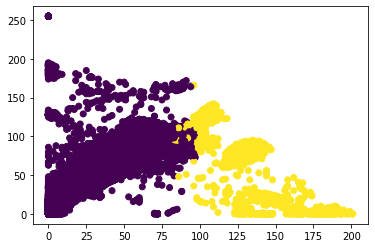

TIME 1.5249028205871582


In [ ]:
## 0.7C1 + 0.3C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.30,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["7C1+3C2"]=score
print(score)
plt.scatter(X_test["R"],X_test["G"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

[1 1 0 ... 0 0 1]
0.8962439646343248


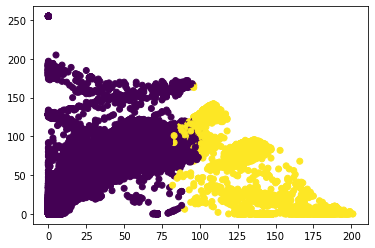

TIME 2.0021681785583496


In [ ]:
# 0.3C1 + 0.7C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.70,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
print(pred)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
print(score)
final_dict["3C1+7C2"]=score
plt.scatter(X_test["R"],X_test["G"], c=pred)
plt.show()
import time
print("TIME",time.time() - start_time)

[0 0 0 ... 1 1 1]
0.894829251163199


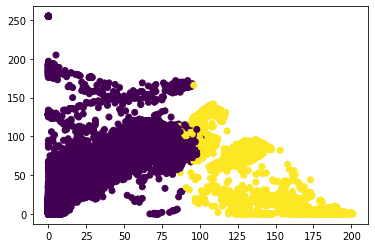

TIME 1.6181073188781738


In [ ]:
# 0.5C1 + 0.5C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.50,random_state=10)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
print(pred)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["5C1+5C2"]=score
print(score)
plt.scatter(X_test["R"],X_test["G"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
courses = list(final_dict.keys())
values = list(final_dict.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Distributions")
plt.ylabel("ACcuracy")
plt.title("Comparision Graph")
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import time
final_dict={}
start_time = time.time()
data_train = pd.DataFrame(pd.read_excel("connect-4.xlsx"))
# data_train = pd.read_csv("SkinSegmentation (1).csv")
print(data_train.head())
labelencoder = LabelEncoder()
for feat in data_train.columns:
    data_train[feat] = labelencoder.fit_transform(data_train[feat].astype(str))
# data_train = labelencoder.fit_transform(data_train["s"])
data_train=data_train.dropna()
without_center=data_train.drop("class",axis=1)
without_center=without_center.dropna()
print(without_center.head())
without_center.shape
print("TIME",time.time() - start_time)

  a1 a2 a3 a4 a5 a6 b1 b2 b3 b4  ... f4 f5 f6 g1 g2 g3 g4 g5 g6 class
0  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
1  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
2  b  b  b  b  b  b  o  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
3  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
4  o  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win

[5 rows x 43 columns]
   a1  a2  a3  a4  a5  a6  b1  b2  b3  b4  ...  f3  f4  f5  f6  g1  g2  g3  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   g4  g5  g6  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   

(67557, 42)

[1 1 1 ... 1 1 1]
[2 2 2 ... 1 0 0]
0.3098568616131563


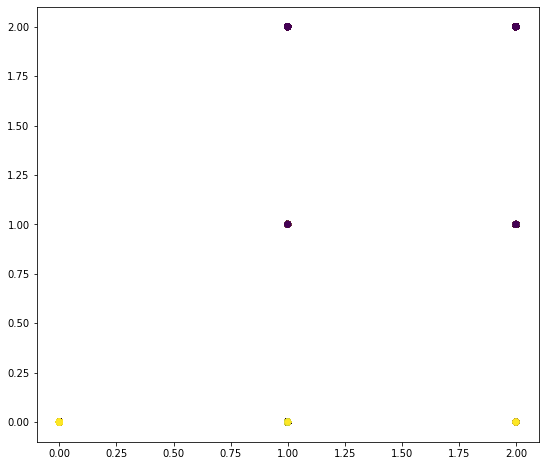

       a1  a2  a3  a4  a5  a6  b1  b2  b3  b4  ...  f4  f5  f6  g1  g2  g3  \
367     2   2   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
384     2   2   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
402     2   2   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
413     2   2   1   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   
427     2   2   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
67552   2   2   0   0   0   0   1   2   1   0  ...   0   0   0   1   1   2   
67553   2   2   0   0   0   0   1   0   0   0  ...   0   0   0   1   2   1   
67554   2   2   0   0   0   0   1   1   0   0  ...   0   0   0   1   2   2   
67555   2   1   0   0   0   0   1   0   0   0  ...   0   0   0   1   2   1   
67556   2   1   1   1   2   0   1   0   0   0  ...   0   0   0   2   0   0   

       g4  g5  g6  cluster  
367     0   0   0        1  
384  

In [ ]:
## Non-distributed
from sklearn import metrics
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import time
start_time = time.time()
model3=KMeans(n_clusters=4)
model3.fit(without_center)
pred=model3.predict(without_center)
# pred[pred == 1] =2
pred[pred == 0] =1
# print()
print(pred)
print(data_train["class"].values)
score = metrics.accuracy_score(data_train["class"],pred)
final_dict["Non-distributed"]=score
# print(model3.labels_)
print(score)
plt.scatter(without_center["a1"],without_center["a2"], c=pred)
plt.show()
center = np.array(model3.cluster_centers_)
# print(center)
cluster_map = without_center
# model3[model3.labels_==1]
# cluster_map['data_index'] = data_train.index.values
cluster_map['cluster'] = model3.labels_
clust_one=cluster_map[cluster_map.cluster == 1]
# cluster_map.head()
print(clust_one)
print("TIME",time.time() - start_time)

0.5172619047619048


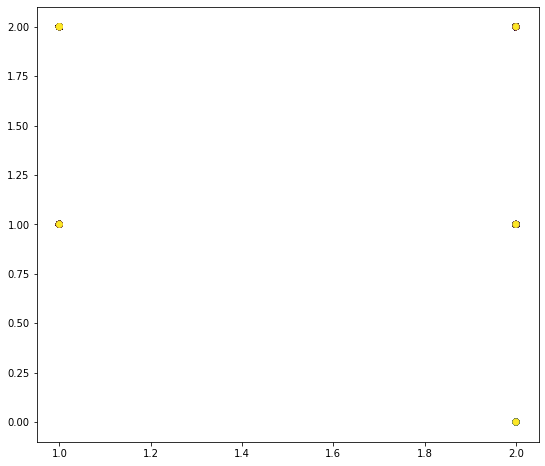

In [ ]:
## 0.3C1 + 0.7C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.30,random_state=70)
model3=KMeans(n_clusters=4)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["3C1+7C2"]=score
print(score)
plt.scatter(X_test["a1"],X_test["a2"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

0.5347789115646259


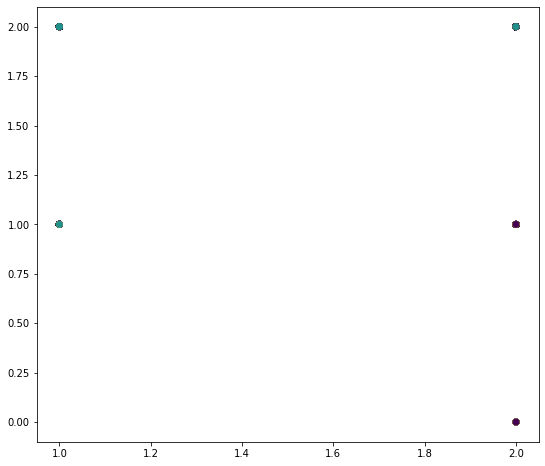

In [ ]:
## 0.7C1 + 0.3C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.70,random_state=70)
model3=KMeans(n_clusters=4)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["7C1+3C2"]=score
print(score)
plt.scatter(X_test["a1"],X_test["a2"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

0.6183333333333333


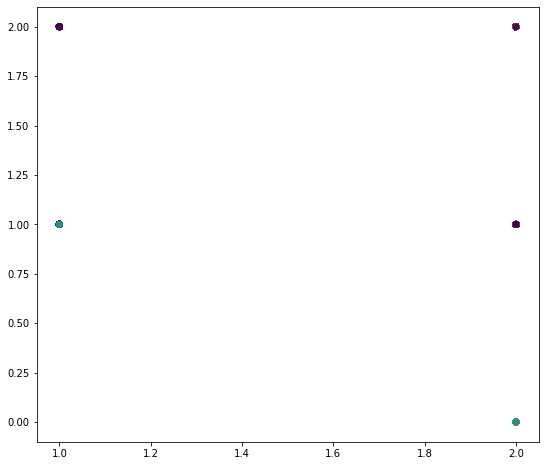

In [ ]:
## 0.5C1 + 0.5C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.50,random_state=70)
model3=KMeans(n_clusters=4)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["5C1+5C2"]=score
print(score)
plt.scatter(X_test["a1"],X_test["a2"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

courses = list(final_dict.keys())
values = list(final_dict.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=10)
train=sc.fit(center)
train.labels_

In [ ]:

clus_train.reset_index(level=0, inplace=True)

cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']

# now do the same for the cluster assignment variable create a unique identifier variable from the index for the
# cluster assignment dataframe to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

17    1364
18    1334
2     1310
7     1304
9     1281
4     1273
10    1268
15    1268
16    1266
13    1248
6     1235
12    1234
0     1233
8     1232
14    1231
19    1227
3     1195
1     1188
11    1163
5     1156
Name: cluster, dtype: int64

In [ ]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
                index        S1        C1        S2        C2        S3  \
cluster                                                                   
0        12726.066504 -0.728098  0.671552  0.551879  0.652049  0.650542   
1        12453.990741 -0.721830 -0.674874  0.486786  0.669964 -0.738350   
2        12547.646565 -0.078267  0.113033 -0.896922 -0.738169  0.605991   
3        12368.096234  0.826008  0.483758 -0.533968 -0.702877  0.614892   
4        12460.548311  0.685558 -0.152081 -0.666394  0.852077  0.803972   
5        11989.608131 -0.851618 -0.680672 -0.874784  0.579073 -0.202439   
6        12751.878543  0.535009 -0.755601 -0.502171 -0.748590 -0.723935   
7        12463.223160 -0.685104  0.818710 -0.589318 -0.634464 -0.450886   
8        12431.634740  0.760616  0.609754  0.712601 -0.553456  0.535806   
9        12715.881343  0.709896 -0.853958  0.578598  0.639288  0.494458   
10       12376.126972 -0.657005  0.028190  0.515962 -0.886227 -

In [ ]:
pokerhand_train=data_train['CLASS']
pokerhand_test=data_test['CLASS']
# put into a pandas dataFrame
pokerhand_train=pd.DataFrame(pokerhand_train)
pokerhand_test=pd.DataFrame(pokerhand_test)
pokerhand_train.reset_index(level=0, inplace=True) # reset index
merged_train_all=pd.merge(pokerhand_train, merged_train, on='index') # merge the pokerhand train with merged clusters
sub1 = merged_train_all[['CLASS', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# respone formula
pokermod = smf.ols(formula='CLASS ~ cluster', data=sub1).fit()
print (pokermod.summary())

print ('means for Poker hands by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for Poker hands by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['CLASS'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  CLASS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.450
Date:                Sun, 23 Oct 2022   Prob (F-statistic):              0.229
Time:                        06:54:49   Log-Likelihood:                -29539.
No. Observations:               25010   AIC:                         5.908e+04
Df Residuals:                   25008   BIC:                         5.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6311      0.010     65.389      0.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(data_train, data_train["CLASS"])
prediction = model.predict(data_test)
val=model.apply(data_test)
print(val)

[[   1  738    4 ...  953    2    1]
 [   3 1873 1283 ...  194  376    4]
 [   3  442  221 ...  198  138  158]
 ...
 [   3 1705   42 ...  545    7  158]
 [   3 1497 1386 ... 1242  390  212]
 [   1 1611 1158 ...  196    2    1]]


In [ ]:
"""
Dr ;;
2: for each site s 2 f1; ... ; Sg do
3: Apply DML to data at site s;
4: Let Y ðsÞ
i ; i ¼ 1; 2; ... ; ns be the group centroids;
5: Let WðsÞ
i ; i ¼ 1; 2; ... ; ns be the group sizes;
6: Ys fY ðsÞ
i : i ¼
"""

from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=10).fit(prediction)
sc.labels_

NameError: ignored

In [ ]:
prediction

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
#-----------------------
array_train = data_train.values
data_train = array_train[:,0:10]
label_train = array_train[:,10]
#Ready the Test Data
array_test = data_test.values
data_test = array_test[:,0:10]
label_test = array_test[:,10]
#----------------------------------------------------------------
# Scaling the Data for our Main Model
#----------------------------------------------------------------
# Scale the Data to Make the NN easier to converge
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(data_train)  
# Transform the training and testing data
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
#----------------------------------------------------------------
#Apply the MLPClassifier:
#----------------------------------------------------------------
acc_array = [0] * 5
for s in range (1,6):
    #Init MLPClassifier
    clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(64,64),
                        activation='tanh', learning_rate_init=0.02,max_iter=2000,random_state=s)
    #Fit the Model
    result = clf.fit(data_train, label_train)
    #Predict
    prediction = clf.predict(data_test)
    #Get Accuracy
    acc = accuracy_score(label_test, prediction)
    #Store in the Array
    acc_array[s-1] = acc
#----------------------------------------------------------------
#Fetch & Print the Results:
#----------------------------------------------------------------
    print(classification_report(label_test,prediction))
    print("Accuracy using MLPClassifier and Random Seed:",s,":",str(acc)) 
    print(confusion_matrix(label_test, prediction))
print("Mean Accuracy using MLPClassifier Classifier: ",np.array(acc_array).mean())
#----------------------------------------------------------------
# Init the Models for Comparision
#----------------------------------------------------------------
models = [RandomForestClassifier(), 
          KNeighborsClassifier(),tree.DecisionTreeClassifier()]

model_names = ["Random Forest","KNN","Decision Tree"]
#----------------------------------------------------------------
# Run Each Model
#----------------------------------------------------------------
for model,name in zip(models,model_names):
    model.fit(data_train, label_train)
    # Display the relative importance of each attribute
    if name == "Random Forest":
        print(model.feature_importances_)   
    #Predict
    prediction = model.predict(data_test)
    # Print Accuracy
    acc = accuracy_score(label_test, prediction)
    print("Accuracy Using",name,": " + str(acc)+'\n')
    print(classification_report(label_test,prediction))
    print(confusion_matrix(label_test, prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    271089
           1       0.99      0.99      0.99    228837
           2       0.94      0.96      0.95     25819
           3       0.93      0.89      0.91     11365
           4       0.52      0.22      0.31      2105
           5       0.60      0.13      0.21      1098
           6       0.78      0.38      0.51       774
           7       0.38      0.18      0.24       113
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2

    accuracy                           0.98    541209
   macro avg       0.61      0.47      0.51    541209
weighted avg       0.98      0.98      0.98    541209

Accuracy using MLPClassifier and Random Seed: 1 : 0.9828162502840861
[[269430   1189      0      0    379     91      0      0      0      0]
 [  1568 226661    530     17     58      2      0      0      0      1]
 [     1    806  24753    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      0.81      0.71    271089
           1       0.58      0.49      0.53    228837
           2       0.38      0.00      0.01     25819
           3       0.44      0.00      0.00     11365
           4       0.30      0.00      0.00      2105
           5       1.00      0.00      0.01      1098
           6       0.00      0.00      0.00       774
           7       0.00      0.00      0.00       113
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2

    accuracy                           0.61    541209
   macro avg       0.33      0.13      0.13    541209
weighted avg       0.59      0.61      0.58    541209

[[218951  52134      3      0      0      0      0      0      0      1]
 [116147 112554    112     17      7      0      0      0      0      0]
 [  6773  18955     86      4      0      0      1      0      0      0]
 [  2033   9296     11

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.66      0.60    271089
           1       0.46      0.43      0.44    228837
           2       0.16      0.01      0.02     25819
           3       0.10      0.01      0.01     11365
           4       0.05      0.00      0.00      2105
           5       0.53      0.02      0.04      1098
           6       0.00      0.00      0.00       774
           7       0.00      0.00      0.00       113
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2

    accuracy                           0.51    541209
   macro avg       0.18      0.11      0.11    541209
weighted avg       0.48      0.51      0.49    541209

[[179329  91184    455    100     10     11      0      0      0      0]
 [129908  97484   1076    322     39      8      0      0      0      0]
 [ 12921  12454    329     99     16      0      0      0      0      0]
 [  4591   6545    165